In [ ]:
#<start>only for colab users

In [1]:
!pip install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 38.7 MB/s eta 0:00:00


In [2]:
!mkdir images

In [3]:
!wget https://github.com/Alireza-Akhavan/deep-face-recognition/raw/master/images/alireza.jpg -P images
!wget https://github.com/Alireza-Akhavan/deep-face-recognition/raw/master/images/ali.jpg -P images
!wget https://github.com/Alireza-Akhavan/deep-face-recognition/raw/master/images/mohsen.jpg -P images
!wget https://github.com/Alireza-Akhavan/deep-face-recognition/raw/master/images/muhammad.jpg -P images
!wget https://github.com/Alireza-Akhavan/deep-face-recognition/raw/master/images/1.jpg -P images
!wget https://github.com/Alireza-Akhavan/deep-face-recognition/raw/master/images/srttu-class.png -P images
!wget https://github.com/Alireza-Akhavan/deep-face-recognition/raw/master/images/m_wrapped.png -P images

--2023-05-25 23:34:42--  https://github.com/Alireza-Akhavan/deep-face-recognition/raw/master/images/alireza.jpg
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Alireza-Akhavan/deep-face-recognition/master/images/alireza.jpg [following]
--2023-05-25 23:34:42--  https://raw.githubusercontent.com/Alireza-Akhavan/deep-face-recognition/master/images/alireza.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39450 (39K) [image/jpeg]
Saving to: ‘images/alireza.jpg’

alireza.jpg         100%[===================>]  38.53K  --.-KB/s    in 0.002s  

2023-05-25 23:34:42 (20.9 MB/s) - ‘images/alireza.jp

In [4]:
!wget https://raw.githubusercontent.com/Alireza-Akhavan/deep-face-recognition/master/ArcFace.py

--2023-05-25 23:34:48--  https://raw.githubusercontent.com/Alireza-Akhavan/deep-face-recognition/master/ArcFace.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4043 (3.9K) [text/plain]
Saving to: ‘ArcFace.py’

ArcFace.py          100%[===================>]   3.95K  --.-KB/s    in 0s      

2023-05-25 23:34:49 (14.5 MB/s) - ‘ArcFace.py’ saved [4043/4043]



In [ ]:
#<end>only for colab users

In [5]:
import ArcFace
from mtcnn.mtcnn import MTCNN
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing import image
import numpy as np
%matplotlib inline

In [6]:
model = ArcFace.loadModel()
face_detector = MTCNN()

arcface_weights.h5  will be downloaded to  /root/.deepface/weights/arcface_weights.h5
Access denied with the following error:
pre-trained weights could not be loaded.
You might try to download it from the url  https://drive.google.com/uc?id=1LVB3CdVejpmGHM28BpqqkbZP5hDEcdZY  and copy to  /root/.deepface/weights/arcface_weights.h5  manually



 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1LVB3CdVejpmGHM28BpqqkbZP5hDEcdZY 



In [7]:
def detect_face(img):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #mtcnn expects RGB but OpenCV read BGR
    detections = face_detector.detect_faces(img_rgb)
    detection = detections[0]
    x, y, w, h = detection["box"]
    detected_face = img[int(y):int(y+h), int(x):int(x+w)]
    return detected_face

### کد خودم

In [7]:
img=cv2.imread("./images/alireza.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #mtcnn expects RGB but OpenCV read BGR
detections = face_detector.detect_faces(img_rgb)
detection = detections[0]
x, y, w, h = detection["box"]
detected_face = img[int(y):int(y+h), int(x):int(x+w)]

1/1 [==============================] - 0s 174ms/step


1/1 [==============================] - 0s 28ms/step


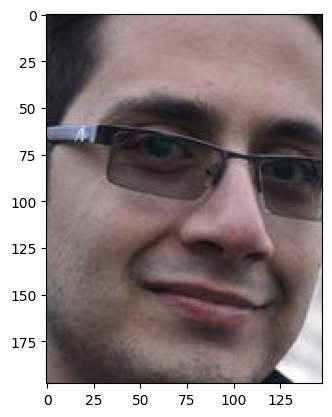

In [11]:
img=plt.imread("./images/alireza.jpg")
detections = face_detector.detect_faces(img)
detection = detections[0]
x, y, w, h = detection["box"]
detected_face = img[int(y):int(y+h), int(x):int(x+w)]
plt.imshow(detected_face)

### کد خودم

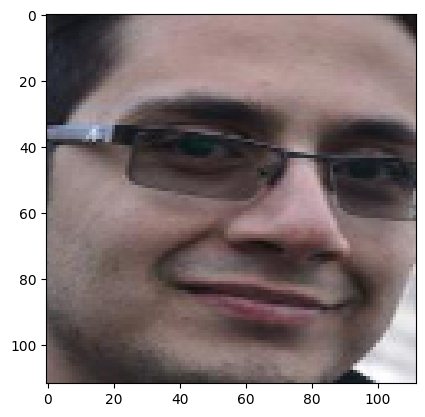

In [12]:
img = cv2.resize(detected_face,(112,112))
plt.imshow(img)

In [53]:
def preprocess_face(img, target_size=(112,112)):
    img = cv2.imread(img)
    img = detect_face(img)
    img = cv2.resize(img, target_size)
    img_pixels = image.img_to_array(img)
    img_pixels = np.expand_dims(img_pixels, axis = 0)
    img_pixels /= 255 #normalize input in [0, 1]
    return img_pixels

In [32]:
img_pixels = image.img_to_array(img)

In [33]:
img_pixels = np.expand_dims(img_pixels, axis = 1)

In [37]:
def img_to_encoding(path):
    img = preprocess_face(path)
    return model.predict(img)[0]

In [68]:
database = {}

database["alireza"] = img_to_encoding("./images/alireza.jpg")
database["ali"] = img_to_encoding("./images/ali.jpg")
database["mohsen"] = img_to_encoding("./images/mohsen.jpg")
database["muhammad"] = img_to_encoding("./images/muhammad.jpg")

1/1 [==============================] - 1s 939ms/step


In [60]:
database.keys()
#database['alireza']
(name,item)=database.items()

ValueError: ignored

In [61]:
def EuclideanDistance(source_representation, test_representation):
    euclidean_distance = source_representation - test_representation
    euclidean_distance = np.sum(np.multiply(euclidean_distance, euclidean_distance))
    euclidean_distance = np.sqrt(euclidean_distance)
    return euclidean_distance

In [62]:
verification_threshhold = 4.4

## Face Verification

In [63]:
def verify(image_path, identity, database):
    # Step 1: Compute the encoding for the image. Use img_to_encoding()
    encoding = img_to_encoding(image_path) 
    
    # Step 2: Compute distance with identity's image
    dist = EuclideanDistance(encoding, database[identity])
    
    # Step 3: Open the door if dist < verification_threshhold, else don't open
    if dist < verification_threshhold:
        print("It's " + str(identity) + ", welcome!")
    else:
        print("It's not " + str(identity) + ", please go away")
             
    return dist

<img src='https://github.com/sedavasema/one-shot-learning/blob/main/images/1.jpg?raw=1' style="width: 100px;"><img src='https://github.com/sedavasema/one-shot-learning/blob/main/images/alireza.jpg?raw=1' style="width: 100px;">

In [69]:
verify("images/1.jpg", "alireza", database)

1/1 [==============================] - 2s 2s/step
It's not alireza, please go away


20.848253

<img src='https://github.com/sedavasema/one-shot-learning/blob/main/images/ali.jpg?raw=1' style="width: 100px;"><img src='https://github.com/sedavasema/one-shot-learning/blob/main/images/alireza.jpg?raw=1' style="width: 100px;">

In [65]:
verify("images/ali.jpg", "alireza", database)

1/1 [==============================] - 0s 239ms/step
It's not alireza, please go away


16.058401

## Face Identification

In [66]:
def who_is_it(image_path, database):
   
    ## Step 1: Compute the target "encoding" for the image. Use img_to_encoding()
    encoding = img_to_encoding(image_path)
    
    ## Step 2: Find the closest encoding ##
    
    # Initialize "min_dist" to a large value, say 100 
    min_dist = 1000
    # Loop over the database dictionary's names and encodings.
    for (name, db_enc) in database.items():
        # Compute L2 distance between the target "encoding" and the current "emb" from the database. (≈ 1 line)
        dist = EuclideanDistance(encoding, db_enc)

        # If this distance is less than the min_dist, then set min_dist to dist, and identity to name. (≈ 3 lines)
        if min_dist > dist:
            min_dist = dist
            identity = name

  
    if min_dist > verification_threshhold:
        print("Not in the database.")
    else:
        print ("it's " + str(identity) + ", the distance is " + str(min_dist))
        
    return min_dist, identity

<img src='https://github.com/sedavasema/one-shot-learning/blob/main/images/srttu-class.png?raw=1' style="width: 300px;">

In [67]:
who_is_it("images/srttu-class.png", database)

1/1 [==============================] - 0s 208ms/step
Not in the database.


(14.269927, 'alireza')

<img src='https://github.com/sedavasema/one-shot-learning/blob/main/images/m.jpg?raw=1' style="width: 160px;">

In [ ]:
who_is_it("images/m.jpg", database)

Not in the database.


(11.598342, 'alireza')

<img src='https://github.com/sedavasema/one-shot-learning/blob/main/images/m_wrapped.jpg?raw=1' style="width: 160px;">

In [70]:
who_is_it("images/m_wrapped.jpg", database)

error: ignored